In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
print("Give Number of Hidden Layer nodes :")
M = int(input())
print("Give number of training samples per bit pair:")
n = int(input())
print("Give std.dev for noise :")
noise = float(input())
print("Give number of Epochs :")
epochs = int(input())
print("Give learning rate :")
lr = float(input())
print("Give the operation you need to train (Enter text in CAPS):")
print("1. XOR")
print("2. OR")
print("3. AND")
option = input()
# Generate Datasets

Input = np.array([[0,0],[0,1],[1,0],[1,1]])
if option =='XOR':
    Output = np.array([[0],[1],[1],[0]])
if option =='OR':
    Output = np.array([[0],[1],[1],[1]])
if option =='AND':
    Output = np.array([[0],[0],[0],[1]])


X = []
Y = []

for i in range(len(Input)):
    for j in range(n):
        X.append(Input[i]+np.random.normal(0,noise,(1,2)))
        Y.append(Output[i]+np.random.normal(0,noise))

X = np.array(X)
X = X.reshape((len(Y),2))
Y = np.array(Y)

# defining functions

def sigm(x):
    return 1/(1+np.exp(-x))

def diff_sigm(x):
    return (sigm(x)-sigm(x)**2)

def layer(x,W,b):
    return (np.matmul(W.T,x.reshape(len(x),1)) + b)

def sq_err(y,Y):
    return (y-Y)**2
# Initializing weights

W1 = np.random.normal(0,1,(2,M))
Bi1 = np.random.normal(0,1,(M,1))
W2 = np.random.normal(0,1,(M,1))
Bi2 = np.random.normal(0,1,(1,1))


# In[2]:


# training
loss_plot = []
for i in range(epochs):
    w1 = np.zeros(W1.shape)
    b1 = np.zeros(Bi1.shape)
    w2 = np.zeros(W2.shape)
    b2 = np.zeros(Bi2.shape)
    for j in range(len(Y)):
        #forward path
        out1 = layer(X[j],W1,Bi1)
#         print(out1)
        z = sigm(out1)
#         print(z)
        out2 = layer(z,W2,Bi2)
        y = sigm(out2)
#         print(y)
        #backpropagation
        b2 += 2*(y-Y[j])*diff_sigm(out2)
        w2 += 2*(y-Y[j])*diff_sigm(out2)*z
        loss = sq_err(y,Y[j])
        for k in range(M):
            b1[k] += (2*(y-Y[j])*diff_sigm(out2)*diff_sigm(out1[k])*W2[k]).reshape(1,)
            w1[:,k] += (2*(y-Y[j])*diff_sigm(out2)*diff_sigm(out1[k])*W2[k]*X[j]).reshape(2,)
    print(loss)
    loss_plot.append(loss)
    W1 -= lr*w1
    W2 -= lr*w2
    Bi1 -= lr*b1
    Bi2 -= lr*b2

Give Number of Hidden Layer nodes :
4
Give number of training samples per bit pair:
100
Give std.dev for noise :
0.001
Give number of Epochs :
1000
Give learning rate :
0.01
Give the operation you need to train (Enter text in CAPS):
1. XOR
2. OR
3. AND
XOR
[[0.2427075]]
[[0.27631716]]
[[0.27099839]]
[[0.27174685]]
[[0.27157955]]
[[0.27158689]]
[[0.27159488]]
[[0.27162985]]
[[0.27168633]]
[[0.2717641]]
[[0.27186222]]
[[0.27197997]]
[[0.27211667]]
[[0.27227176]]
[[0.27244473]]
[[0.27263513]]
[[0.27284258]]
[[0.27306674]]
[[0.27330734]]
[[0.27356415]]
[[0.27383697]]
[[0.27412566]]
[[0.2744301]]
[[0.27475023]]
[[0.27508601]]
[[0.27543744]]
[[0.27580453]]
[[0.27618735]]
[[0.27658598]]
[[0.27700054]]
[[0.27743118]]
[[0.27787807]]
[[0.2783414]]
[[0.2788214]]
[[0.27931834]]
[[0.27983248]]
[[0.28036414]]
[[0.28091366]]
[[0.2814814]]
[[0.28206776]]
[[0.28267316]]
[[0.28329805]]
[[0.28394291]]
[[0.28460827]]
[[0.28529465]]
[[0.28600264]]
[[0.28673284]]
[[0.2874859]]
[[0.2882625]]
[[0.28906333]]
[

[[0.00277197]]
[[0.00276166]]
[[0.00275142]]
[[0.00274125]]
[[0.00273116]]
[[0.00272113]]
[[0.00271117]]
[[0.00270128]]
[[0.00269146]]
[[0.00268171]]
[[0.00267202]]
[[0.00266239]]
[[0.00265283]]
[[0.00264334]]
[[0.00263391]]
[[0.00262454]]
[[0.00261523]]
[[0.00260599]]
[[0.00259681]]
[[0.00258768]]
[[0.00257862]]
[[0.00256962]]
[[0.00256067]]
[[0.00255179]]
[[0.00254296]]
[[0.00253419]]
[[0.00252547]]
[[0.00251682]]
[[0.00250821]]
[[0.00249966]]
[[0.00249117]]
[[0.00248273]]
[[0.00247435]]
[[0.00246602]]
[[0.00245774]]
[[0.00244951]]
[[0.00244133]]
[[0.00243321]]
[[0.00242513]]
[[0.00241711]]
[[0.00240914]]
[[0.00240121]]
[[0.00239333]]
[[0.00238551]]
[[0.00237773]]
[[0.00237]]
[[0.00236231]]
[[0.00235467]]
[[0.00234708]]
[[0.00233954]]
[[0.00233204]]
[[0.00232458]]
[[0.00231717]]
[[0.00230981]]
[[0.00230249]]
[[0.00229521]]
[[0.00228797]]
[[0.00228078]]
[[0.00227363]]
[[0.00226652]]
[[0.00225946]]
[[0.00225243]]
[[0.00224545]]
[[0.00223851]]
[[0.0022316]]
[[0.00222474]]
[[0.00221792]]

[0.2427075  0.27631716 0.27099839 0.27174685 0.27157955 0.27158689
 0.27159488 0.27162985 0.27168633 0.2717641  0.27186222 0.27197997
 0.27211667 0.27227176 0.27244473 0.27263513 0.27284258 0.27306674
 0.27330734 0.27356415 0.27383697 0.27412566 0.2744301  0.27475023
 0.27508601 0.27543744 0.27580453 0.27618735 0.27658598 0.27700054
 0.27743118 0.27787807 0.2783414  0.2788214  0.27931834 0.27983248
 0.28036414 0.28091366 0.2814814  0.28206776 0.28267316 0.28329805
 0.28394291 0.28460827 0.28529465 0.28600264 0.28673284 0.2874859
 0.2882625  0.28906333 0.28988914 0.2907407  0.29161883 0.29252436
 0.29345816 0.29442114 0.29541422 0.29643838 0.29749458 0.29858383
 0.29970715 0.30086556 0.30206011 0.30329182 0.30456171 0.30587079
 0.30722004 0.30861038 0.31004269 0.31151778 0.31303638 0.3145991
 0.31620647 0.31785883 0.31955641 0.32129924 0.32308715 0.32491976
 0.32679645 0.32871635 0.33067831 0.33268092 0.33472243 0.33680083
 0.33891377 0.34105863 0.34323246 0.34543202 0.34765383 0.349894

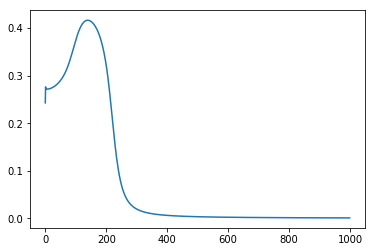

In [23]:
# loss_plot = np.array(loss_plot)
loss_plot = (np.array(loss_plot)).reshape((len(loss_plot),))
print(loss_plot)
plt.plot(loss_plot)
plt.show()
plt.savefig('1000epochs.pdf')

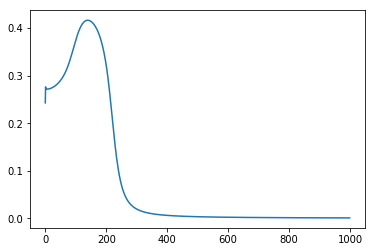

In [24]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(loss_plot)
plt.show() 
fig.savefig('plot.png')